In [212]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from statistics import mode
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle
from sklearn.cluster import Birch
import seaborn as sns
from sklearn.metrics import silhouette_score

In [120]:
df = pd.read_csv('/Users/ritaguan/Desktop/nb_py.csv')

In [121]:
df.head()

,Unnamed: 0,Unnamed: 0.1,created_at,lang,author_id,text,id,text_token,emoji_free_tweets,url_free_tweets,...,lemmas,lemmas_back_to_text,lemma_tokens,positive_sentiment,negative_sentiment,sentiment_tokens,len_tokens,has_positive,has_negative,label
0,1,1,2022-09-09T23:59:21.000Z,en,1515895379329708032,RT @dvdmckay: We’ve got a new paper out on cli...,1568388623288107008,"['@dvdmckay:', 'we’ve', 'got', 'new', 'paper',...",RT @dvdmckay: We’ve got a new paper out on cli...,RT @dvdmckay: We’ve got a new paper out on cli...,...,"['rt', '@dvdmckay', 'new', 'paper', 'tippingpo...",rt @dvdmckay new paper tippingpoint @sciencema...,"['rt', 'dvdmckay', 'new', 'paper', 'tippingpoi...",['exceed'],[],['exceed'],1,1,0,1
1,2,2,2022-09-09T23:59:16.000Z,en,1547977583714660355,RT @DEATHBALL13: Let's not forget good old #Ch...,1568388601926524928,"['@deathball13:', ""let's"", 'forget', 'good', '...",RT @DEATHBALL13: Let's not forget good old #Ch...,RT @DEATHBALL13: Let's not forget good old #Ch...,...,"['rt', '@deathball13', 'let', 'forget', 'good'...",rt @deathball13 let forget good old charlieche...,"['rt', 'deathball13', 'let', 'forget', 'good',...",['good'],['propaganda'],"['good', 'propaganda']",2,1,1,0
2,3,3,2022-09-09T23:58:51.000Z,en,1302354043793223680,RT @EnergyLiveNews: Prime Minister Liz Truss a...,1568388497152638978,"['@energylivenews:', 'prime', 'minister', 'liz...",RT @EnergyLiveNews: Prime Minister Liz Truss a...,RT @EnergyLiveNews: Prime Minister Liz Truss a...,...,"['rt', '@energylivenews', 'prime', 'minister',...",rt @energylivenews prime minister liz truss an...,"['rt', 'energylivenews', 'prime', 'minister', ...",[],['freeze'],['freeze'],1,0,1,-1
3,4,4,2022-09-09T23:58:45.000Z,en,126075164,RT @EnergyHouseVA: Energy Crisis Will Be Short...,1568388472695853056,"['@energyhouseva:', 'energy', 'crisis', 'short...",RT @EnergyHouseVA: Energy Crisis Will Be Short...,RT @EnergyHouseVA: Energy Crisis Will Be Short...,...,"['rt', '@energyhouseva', 'energy', 'crisis', '...",rt @energyhouseva energy crisis short live rea...,"['rt', 'energyhouseva', 'energy', 'crisis', 's...",[],['crisis'],['crisis'],1,0,1,-1
4,5,5,2022-09-09T23:58:39.000Z,en,80890155,RT @NickKristof: We just lost power here at @K...,1568388444430245888,"['@nickkristof:', 'lost', 'power', '@kristoffa...",RT @NickKristof: We just lost power here at @K...,RT @NickKristof: We just lost power here at @K...,...,"['rt', '@nickkristof', 'lose', 'power', '@kris...",rt @nickkristof lose power @kristoffarm rural ...,"['rt', 'nickkristof', 'lose', 'power', 'kristo...",[],['lose'],['lose'],1,0,1,-1


In [122]:
df['label'].unique()

array([ 1,  0, -1])

Do more step to clean data for clustering

In [123]:
df_cluster = df[['sentiment_tokens','label','text','lemmas_back_to_text','has_positive', 'has_negative']]
df_cluster['sentiment_tokens'] = df_cluster.sentiment_tokens.astype("category").cat.codes
df_cluster['text'] = df_cluster.text.astype("category").cat.codes
df_cluster['lemmas_back_to_text'] = df_cluster.lemmas_back_to_text.astype("category").cat.codes

<ipython-input-123-1474b07d0231>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['sentiment_tokens'] = df_cluster.sentiment_tokens.astype("category").cat.codes
<ipython-input-123-1474b07d0231>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['text'] = df_cluster.text.astype("category").cat.codes
<ipython-input-123-1474b07d0231>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [124]:
df_cluster

,sentiment_tokens,label,text,lemmas_back_to_text,has_positive,has_negative
0,7,1,32,14,1,0
1,13,0,11,13,1,1
2,11,-1,15,19,0,1
3,3,-1,14,18,0,1
4,21,-1,23,31,0,1
...,...,...,...,...,...,...
65,36,1,35,22,1,0
66,7,1,32,14,1,0
67,31,1,29,38,1,0
68,6,-1,0,5,0,1


In [125]:
df_cluster['label'].unique()

array([ 1,  0, -1])

In [126]:
df_cluster.to_csv('cluster_py.csv')

# Unsupervised Learning

In [190]:
##Seperate the dataset into features and labels

#X = df_cluster.iloc[:,1:7].values 
#y = df_cluster.iloc[:,7:].values
X = df_cluster.drop(['label'], axis=1)
y = df['label']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

model=StandardScaler()

#X_train = model.fit_transform(X_train)
model.fit(X)
#X_test = model.transform(X_test)
X = model.transform(X)

Perfrom KMeans

In [191]:
distortions = []
inertias = []
k = 11

for k in range(1, k):
    kmeanModel = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis = 1))/ X.shape[0])
    inertias.append(kmeanModel.inertia_)
    evaluation = pd.DataFrame.from_records({'Cluster':np.arange(1, k+1), 'Distortion': distortions, 'Inertia': inertias})

In [192]:
evaluation

,Cluster,Distortion,Inertia
0,1,2.167226,350.000000
1,2,1.804556,255.343787
2,3,1.497943,192.338020
3,4,1.298244,144.530494
4,5,1.229536,124.028701
5,6,1.099068,106.032484
6,7,1.027376,93.469959
7,8,0.912700,74.075603
8,9,0.794441,64.267658
9,10,0.703269,56.096433


array([<AxesSubplot:xlabel='Cluster'>, <AxesSubplot:xlabel='Cluster'>],
      dtype=object)

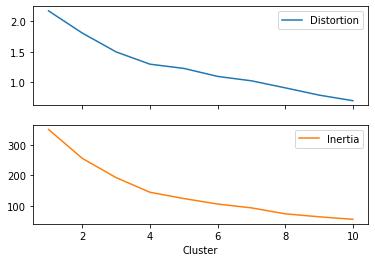

In [193]:
evaluation.plot.line(x= 'Cluster',subplots= True)

<ipython-input-194-6515fe2be934>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['label'] = labels4


<AxesSubplot:xlabel='text', ylabel='sentiment_tokens'>

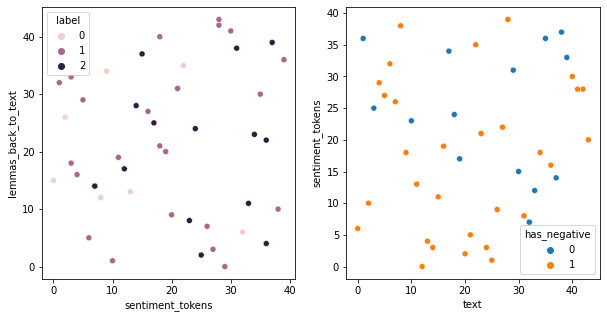

In [194]:
bestK = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
labels4 = bestK.fit_predict(X)
df_cluster['label'] = labels4
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(x='sentiment_tokens', y = 'lemmas_back_to_text', hue='label', data = df_cluster, ax=ax[0])
sns.scatterplot(x='text', y = 'sentiment_tokens', hue='has_negative', data = df_cluster, ax=ax[1])

Perform DBSCAN and predict the labels

In [210]:
modeldbscan = DBSCAN(eps=0.3, min_samples = 10).fit(X)
labels_dbscan = modeldbscan.labels_

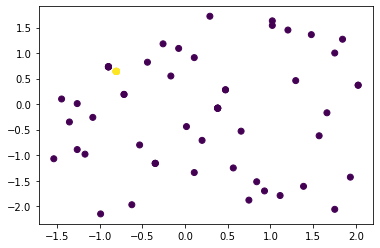

In [211]:
plt.scatter(X[:,0], X[:,1], c=labels_dbscan)
plt.show()


In [213]:
print("Silhoette Coefficient: %0.3f" % silhouette_score(X, labels_dbscan))

Silhoette Coefficient: 0.149


Hierarchical Clustering

In [201]:
# Perform Agglomerative Clustering
modelagg = AgglomerativeClustering().fit(X)
labelsagg = modelagg.labels_

In [214]:
print("Silhoette Coefficient: %0.3f" % silhouette_score(X, labelsagg))

Silhoette Coefficient: 0.274


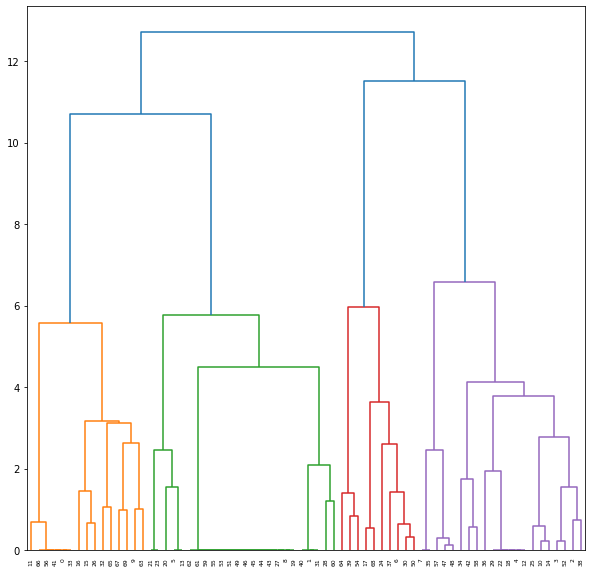

In [202]:
# create linkage for agglomerative clustering, and the dendrogram for the linkage. Suggest the optimal number of clusters based on the dendrogram.
plt.figure(figsize=(10,10))
Z = linkage(X, method='ward')
dend = dendrogram(Z)
plt.axhline(y=21, color='r', linestyle='--', label='21')

Mean Shift

In [148]:
# Perform MeanShift Clustering and predict number 
modelmean = MeanShift(bandwidth = 2).fit(X)
labelmean = modelmean.labels_
cluster_centers = modelmean.cluster_centers_
labels_unique = np.unique(labelmean)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : ",n_clusters_ ) 

number of estimated clusters :  5


In [149]:
# perform birc clustering and predict number of clusters
brc = Birch(n_clusters=3).fit(X)
labels_brc = brc.predict(X)

In [150]:
labels_brc

array([1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1,
       1, 1, 2, 1])